## Imports

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from datetime import datetime
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Importing the datasets
train_data = pd.read_csv("analysisData.csv")
train_data.shape

F:\Installed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(36839, 91)

In [3]:
test_data = pd.read_csv("scoringData.csv")
test_data.shape

F:\Installed\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (31,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9210, 90)

In [4]:
train_data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24383993,<5minutes to Manhattan luxury apartment>,New super luxury hotel apartment The door of t...,NaN,New super luxury hotel apartment The door of t...,"2840 Jackson Ave, Long Island City",NaN,6 subway - EMR7NW Thirty seconds to the subwa...,dryers washing machine kitchen utensils and ...,Happy to introduce New York 可以提供中文服务,NaN,Mengxiao,2018-11-01,US,NaN,NaN,NaN,NaN,f,Long Island City,1.0,1.0,"['email', 'phone', 'offline_government_id', 's...",t,f,"Queens, NY, United States",Long Island City,Long Island City,Queens,Queens,NY,11101,New York,"Queens, NY",US,United States,t,Serviced apartment,Private room,2,1.5,1,1.0,Real Bed,"Wifi, Air conditioning ,Kitchen,Elevator,Washe...",NaN,65,NaN,NaN,0.0,0.0,1,0,6,11,6,6,11,11,6.0,11.0,3 weeks ago,t,10,10,10,10,3,3,2018-11-23,2018-12-26,100,10,9,10,10,10,10,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0,1,0,1.88
1,4643640,<SO CLOSE TO MANHATTAN>,Staten Island is a tourist destination. Take...,NaN,Staten Island is a tourist destination. Take...,safe neighborhood close to shore. Green scen...,NaN,public transit and ferry to manhattan a walkin...,NaN,happy to assist in browsing manhattan,NaN,Jimmy,2014-01-13,"New York, New York, United States",likes meeting new people. Good people you do ...,within a few hours,100%,NaN,f,Rosebank,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Staten Island, NY, United States",Rosebank,Shore Acres,Staten Island,Staten Island,NY,10305,New York,"Staten Island, NY",US,United States,t,House,Private room,2,1.0,2,2.0,Real Bed,"TV,Wifi, Free street parking , Smoke detector ...",NaN,70,430.0,NaN,100.0,10.0,1,20,1,1125,1,1,1125,1125,1.0,1125.0,2 weeks ago,t,20,29,59,59,8,6,2015-11-01,2019-01-01,85,10,8,10,10,10,9,f,NaN,NaN,f,f,flexible,f,f,2,0,2,0,0.21
2,17290376,<Big Sunny Room in Bedstuy/Clinton Hill Browns...,Giant sunny room in a spacious brownstone. On...,NaN,Giant sunny room in a spacious brownstone. On...,NaN,NaN,NaN,"The apartment has four other roommates, one c...",Keys will be left in a lockbox on the front do...,NaN,Julia,2015-11-13,"New York, New York, United States","Originally from Nashville, Tennessee, I curren...",NaN,NaN,NaN,f,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brooklyn, NY, United States",Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11205,New York,"Brooklyn, NY",US,United States,t,Apartment,Private room,3,1.0,1,1.0,Real Bed,"Wifi, Air conditioning ,Kitchen,Heating, Smoke...",N

In [5]:
# Printing the 1st 5 columns
test_data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23136,<Cozy Entire Floor of Brownstone>,Urban retreat: enjoy 500 s. f. floor in 1899 ...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s. f. floor in 1899 ...,Just the right mix of urban center and local n...,"My husband, Tivon, is NYC-licensed For-Hire-...",B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top f...",Smoking - outside please; pets allowed but ple...,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,94%,NaN,f,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"Brooklyn, NY, United States",Clinton Hill,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,t,Guest suite,Entire home/apt,3,1.0,1,3.0,Real Bed,"TV, Cable TV ,Internet,Wifi, Air conditioning ...",500.0,575.0,NaN,500.0,NaN,1,0,1,730,1,1,730,730,1.0,730.0,today,t,7,16,22,172,227,60,2014-09-30,2019-01-08,90,9,9,10,10,10,10,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.36
1,37597,<CBG Helps Haiti Rm #2>,This sunny from second floor room has a comfor...,* Owner occupied brownstone with garden - hom...,This sunny from second floor room has a comfor...,"It's historic, multi ethnic and cross class d...",NaN,Five minute walk to subways; twenty minutes to...,Full kitchen with equipment and basic cooking ...,As seems desirable both ways.,"Pls understand we are working household, albe...",Lisel,2009-06-20,"Brooklyn, New York, United States",* Owner occupied Park Slope brownstone with ga...,NaN,NaN,NaN,f,Park Slope,5.0,5.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Park Slope,Park Slope,Brooklyn,Brooklyn,NY,11217,New York,"Brooklyn, NY",US,United States,t,Bed and breakfast,Private room,3,2.5,4,8.0,Real Bed,"TV, Cable TV ,Internet,Wifi, Air conditioning ...",NaN,850.0,NaN,NaN,10.0,2,30,2,730,2,2,730,730,2.0,730.0,a week ago,t,29,59,89,364,64,13,2010-01-07,2018-12-11,91,9,9,10,9,10,9,f,NaN,NaN,f,f,flexible,f,t,5,0,5,0,0.58
2,38982,"<MAISON DES SIRENES1, bohemian apartment>",NaN,I am the lucky owner of an amazing brownstone....,I am the lucky owner of an amazing brownstone....,NaN,I am required by New York city and State to co...,KIngston Throop with the C train is the closes...,Entire apartment and private terrasse,I live on the two bottom floors . i am usually...,"RULES: (if the rules are not resp

In [6]:
my_submission = pd.DataFrame({'id': test_data['id']})
my_submission.head()

,id
0,23136
1,37597
2,38982
3,42288
4,45375


In [7]:
my_submission.shape

(9210, 1)

In [8]:
# Viewing the column headings
train_data.columns

Index(['id', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
     

In [9]:
# Identifying the unique number of values in the dataset
train_data.nunique()

id                                              36839
name                                            36310
summary                                         33741
space                                           26144
description                                     35534
neighborhood_overview                           21898
notes                                           14541
transit                                         22948
access                                          20054
interaction                                     20449
house_rules                                     21068
host_name                                        9693
host_since                                       3574
host_location                                    1212
host_about                                      18385
host_response_time                                  4
host_response_rate                                 79
host_acceptance_rate                                0
host_is_superhost           

In [10]:
train_data.isna().sum()

id                                                  0
name                                                0
summary                                          1407
space                                            9260
description                                       402
neighborhood_overview                           12235
notes                                           20576
transit                                         11330
access                                          13959
interaction                                     13822
house_rules                                     13208
host_name                                           1
host_since                                          1
host_location                                      90
host_about                                      13194
host_response_time                              13241
host_response_rate                              13241
host_acceptance_rate                            36839
host_is_superhost           

## Data Preprocessing

In [11]:
# Dropping columns which will be of no use for our model
col_list = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
            'house_rules', 'host_name', 'host_about', 'amenities', 'license', 'jurisdiction_names', 'host_acceptance_rate',
            'square_feet', 'monthly_price', 'weekly_price', 'id', 'neighbourhood', 'host_listings_count', 'availability_30',
            'availability_90']

In [12]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [13]:
# Function to extraxt year and month from datetime data
def conv_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [14]:
date_list = ['host_since', 'first_review', 'last_review']
conv_date(date_list)

In [15]:
# Function to obtain year and month from datetime data
def get_year(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.year)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.year)
def get_month(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.month)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.month)

In [16]:
get_year('host_since_year', 'host_since')
get_month('host_since_month', 'host_since')
get_year('first_review_year', 'first_review')
get_month('first_review_month', 'first_review')
get_year('last_review_year', 'last_review')
get_month('last_review_month', 'last_review')

In [17]:
col_list = ['host_since', 'first_review', 'last_review']

In [18]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

### Imputing Missing Data

In [19]:
train_data.isna().sum()

host_location                                      90
host_response_time                              13241
host_response_rate                              13241
host_is_superhost                                   1
host_neighbourhood                               4955
host_total_listings_count                           1
host_verifications                                  0
host_has_profile_pic                                1
host_identity_verified                              1
street                                              0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
city                                               47
state                                               6
zipcode                                           452
market                                             86
smart_location                                      0
country_code                                        0
country                     

In [20]:
# Function to impute with None
def impute_none(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('None')
        test_data[i] = test_data[i].fillna('None')

In [21]:
imp_none_list = ['host_location', 'host_response_time', 'host_response_rate', 'host_neighbourhood', 'city', 'state', 'zipcode',
                 'market']
impute_none(imp_none_list)

In [22]:
# Function to impute with False
def impute_false(imp_false_list):
    for i in imp_false_list:
        train_data[i] = train_data[i].fillna('f')
        test_data[i] = test_data[i].fillna('f')

In [23]:
imp_false_list = ['host_has_profile_pic', 'host_is_superhost', 'host_identity_verified']
impute_false(imp_false_list)

In [24]:
# Function to impute missing values by rounded value of mean
def round_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [25]:
imp_mean_list = ['host_total_listings_count', 'host_since_year', 'host_since_month', 
                 'first_review_year', 'first_review_month', 'last_review_year', 'last_review_month']
round_mean(imp_mean_list)

In [26]:
# Function to impute with 0
def impute_nil(imp_nil_list):
    for i in imp_nil_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)

In [27]:
imp_nil_list = ['beds']
impute_nil(imp_nil_list)

In [28]:
# Function to impute with 0
def impute_median(imp_med_list):
    for i in imp_med_list:
        train_data[i] = train_data[i].fillna(train_data[i].median())
        test_data[i] = test_data[i].fillna(test_data[i].median())

In [29]:
imp_med_list = ['reviews_per_month', 'security_deposit', 'cleaning_fee']
impute_median(imp_med_list)

In [30]:
train_data.isna().sum()

host_location                                   0
host_response_time                              0
host_response_rate                              0
host_is_superhost                               0
host_neighbourhood                              0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
street                                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
city                                            0
state                                           0
zipcode                                         0
market                                          0
smart_location                                  0
country_code                                    0
country                                         0
is_location_exact                               0


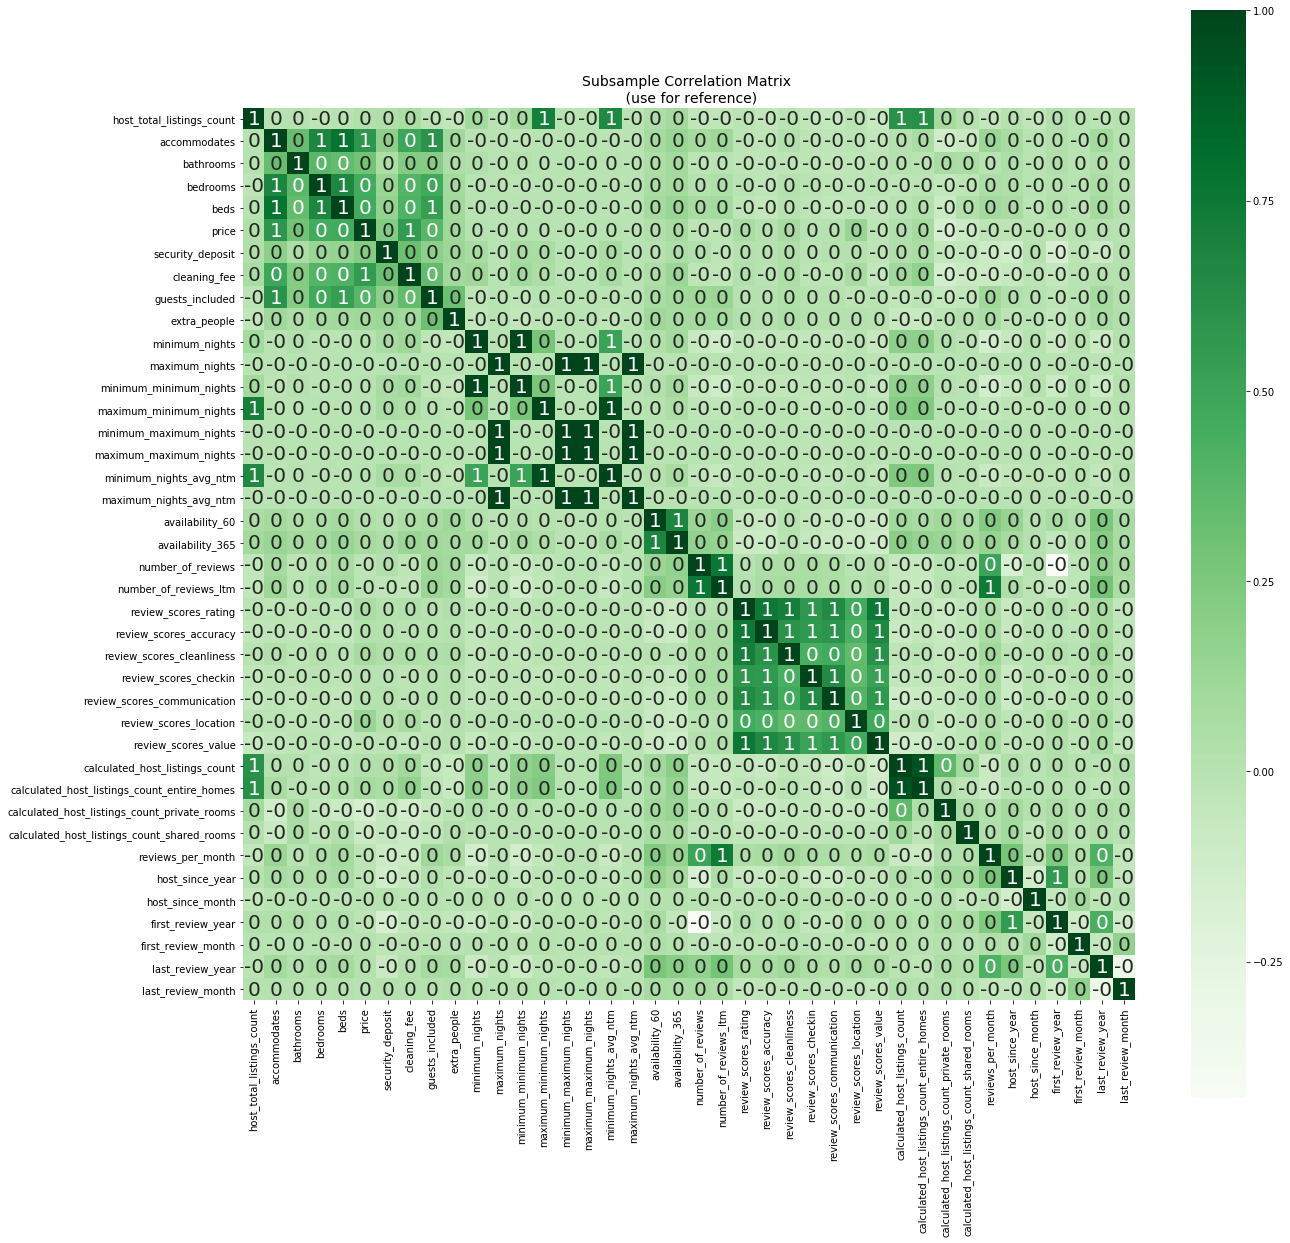

In [31]:
# Our Subsample
corr = train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.0f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Correlation Matrix \n (Heatmap)', fontsize=14)
plt.show()

In [32]:
train_data.dtypes

host_location                                    object
host_response_time                               object
host_response_rate                               object
host_is_superhost                                object
host_neighbourhood                               object
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
street                                           object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
city                                             object
state                                            object
zipcode                                          object
market                                           object
smart_location                                   object
country_code                                    